# <center>Volatility</center>

Volatility/standard deviation is a measure of the dispersion of returns over a given period relative to the mean. Volatility is often used as a measure of risk, as investments with higher volatility tend to be perceived as riskier due to greater fluctuations in their returns.

$$\text{Volatility}=\sqrt{E[(X-E[X])^2]}$$

Upper & Lower semi deviations can be used to give a more complete picture of an investment's risk profile as they provide separate measures of positive and negative returns.

$$\sigma_-(X)=\sqrt{E[(X-E[X])_-^2]}\qquad\sigma_+(X)=\sqrt{E[(X-E[X])_+^2]}$$

Here we want to calculate these 3 risk measure for Natixis stock.

In [118]:
import scipy.stats as st    
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

#Open File
def Openfile(file):
    f=open(file,'r')
    l=[]
    for line in f:
        currentline=line.split()
        l.append([datetime.strptime(currentline[0], "%d/%m/%Y").date(),float(currentline[1].replace(',','.'))])
    f.close()
    return l

#Rogner la liste en fonction des dates
def Rogner(l,debut,fin):
    lrogner=[]
    for i in range(len(l)):
        if l[i][0]>=debut and l[i][0]<=fin:
            lrogner.append(l[i])
    return lrogner

#Calculation of returns
def rendement(l):
    rend=[]
    for i in range(len(l)):
        if(i==0): rend.append(0.0)
        else: rend.append((l[i][1]-l[i-1][1])/l[i-1][1])
    return rend
  
#Volatility
def Volatility(l,start,end):
    lrogner=Rogner(l, start, end)
    rend=rendement(lrogner)
    vol=np.std(rend)
    upper_semi_deviation=np.std(list(filter(lambda x: x > 0, rend)))
    lower_semi_deviation=np.std(list(filter(lambda x: x < 0, rend)))
    return vol,upper_semi_deviation,lower_semi_deviation

In [119]:
#Main
l=Openfile('NatixisStock.txt')  #open file

vol1,upper_semi_deviation1,lower_semi_deviation1=Volatility(l,dt.date(2015, 1, 1),dt.date(2015, 12, 31))
vol2,upper_semi_deviation2,lower_semi_deviation2=Volatility(l,dt.date(2016, 1, 1),dt.date(2016, 12, 31))
vol3,upper_semi_deviation3,lower_semi_deviation3=Volatility(l,dt.date(2017, 1, 1),dt.date(2017, 12, 31))
vol4,upper_semi_deviation4,lower_semi_deviation4=Volatility(l,dt.date(2018, 1, 1),dt.date(2018, 12, 31))

print("Year 1 : vol = ",vol1,"\nupper semi deviation = ",upper_semi_deviation1,"\nlower semi deviation = ",lower_semi_deviation1,"\n")
print("Year 2 : vol = ",vol2,"\nupper semi deviation = ",upper_semi_deviation2,"\nlower semi deviation = ",lower_semi_deviation2,"\n")
print("Year 3 : vol = ",vol3,"\nupper semi deviation = ",upper_semi_deviation3,"\nlower semi deviation = ",lower_semi_deviation3,"\n")
print("Year 4 : vol = ",vol4,"\nupper semi deviation = ",upper_semi_deviation4,"\nlower semi deviation = ",lower_semi_deviation4,"\n")

Year 1 : vol =  0.019975035827242766 
upper semi deviation =  0.01268252407856391 
lower semi deviation =  0.01262515647315603 

Year 2 : vol =  0.02700104198065025 
upper semi deviation =  0.016338276561428094 
lower semi deviation =  0.02026777141868367 

Year 3 : vol =  0.015917702897877656 
upper semi deviation =  0.012456120881143508 
lower semi deviation =  0.008084455962247387 

Year 4 : vol =  0.015683295115826796 
upper semi deviation =  0.009167818977120696 
lower semi deviation =  0.01178195044511408 



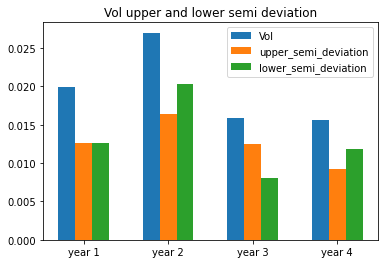

In [120]:
#plot
labels=["year 1","year 2","year 3","year 4"]
year = np.arange(len(labels))
vol=[vol1,vol2,vol3,vol4]
upper_semi_deviation=[upper_semi_deviation1,upper_semi_deviation2,upper_semi_deviation3,upper_semi_deviation4]
lower_semi_deviation=[lower_semi_deviation1,lower_semi_deviation2,lower_semi_deviation3,lower_semi_deviation4]
plt.bar(year-0.2,vol,0.2,label = 'Vol')
plt.bar(year,upper_semi_deviation,0.2,label = 'upper_semi_deviation')
plt.bar(year+0.2,lower_semi_deviation,0.2,label = 'lower_semi_deviation')
plt.title("Vol upper and lower semi deviation")
plt.xticks(year, labels)
plt.legend()
plt.show()

**<u>Annualized Volatility</u>** :  

Annualized volatility is a measure of the fluctuation of the price of a financial instrument over a given period.
In traditional probabilistic models, the annual volatility is $\sqrt{12}$ the
monthly volatility, $\sqrt{52}$ the weekly volatility or $\sqrt{252}$ the daily volatility.

Assumptions:  
-Gaussian returns  
-identically distributed returns  
-independent returns  

Incorporating the Hurst exponent into the calculation of annualized volatility can provide a more complete picture of a financial instrument's volatility.  

H=0,5 : indicates a random walk (standard Brownian motion)  
H>0.5 : indicates trending behavior  
H<0.5 : indicates mean-reverting behavior  


In [121]:
#Hurst exponent
def hurst(time_series, max_lag=20):
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

lrogner=Rogner(l,dt.date(2015, 1, 1),dt.date(2015, 12, 31))
rend=rendement(lrogner)
hurst_exponent=hurst(rend,20)
print("Hurst Exponent : ",hurst_exponent)
#daily volatility 2015
vol=np.std(rend)
print("Daily Volatility (2015): ",vol)

#Annualized Volatility
#Without Hurst
Annualized_Volatility=vol* np.sqrt(252) #252 nombre de trading days en 2015
print("Annualized Volatility (2015): ",Annualized_Volatility)

#With Hurst
Annualized_Volatility = vol * np.sqrt(252) / pow(2.0, hurst_exponent)
print("Annualized Volatility (2015): ",Annualized_Volatility)


Hurst Exponent :  -0.01794461972243643
Daily Volatility (2015):  0.019975035827242766
Annualized Volatility (2015):  0.3170938633709383
Annualized Volatility (2015):  0.32106259097304835
